# Contrastive analysis

In [55]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#from typing import List, Dict, Optional, Tuple
from exploration_utils import compute_distribution, save_plot, plot_superimposed_distributions

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/andrea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/andrea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Using NLTK stopwords
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

## Creating our dataset distribution

In [4]:
df = pd.read_csv(os.path.join("..",'philosophy_data.csv'))
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [5]:
SCHOOLS = df['school'].unique()

In [6]:
# all this mess because .csv saves lists as strings
df['tokenized_txt'] = df['tokenized_txt'].apply(lambda frase: [word.strip('\'') for word in frase[1:-1].split(', ')])

### ~~Space~~ Tokens oddity

In order to create the corpora distributions, we need to create bag of words. But, while working, I noticed something odd...

**Way 1**: We could use Scikit-learn's `CountVectorizer` applied to the `sentence_str` column of the dataframe.

In [7]:
from exploration_utils import create_bow_legacy

# create a dictionary with the BOW count for each philosophical school,
# in which the stopwords are filtered out
schools_bow_sklearn = {}
for school in SCHOOLS:
    schools_bow_sklearn[school] = create_bow_legacy(school=school, dataframe=df, stopwords=stopwords_list)

**Way 2**: We could stick to NLTK and use the `FreqDist` on the already tokenized sentences of the dataframe (`tokenized_txt` column)

In [8]:
# Let's create a BoW for each class, using NLTK and the tokenized_txt column
from itertools import chain
from exploration_utils import create_bow

COMPARE = 0

schools_bow = {}
schools_bow_Mk2 = {}
for school in SCHOOLS:
    schools_bow[school] = create_bow(school, df, lowercase=False, stopwords=stopwords_list)
    
    if COMPARE:
        tokenized_sentences_Mk2 = [nltk.word_tokenize(sent.lower()) for sent in df.loc[df['school']==school,'sentence_str']]
        schools_bow_Mk2[school] = nltk.FreqDist([w for w in chain.from_iterable(tokenized_sentences_Mk2) if (w not in stopwords_list and w.isalnum())])

Are the two methods equal?

In [10]:
nltk_minus_sklearn = {}
sklearn_minus_nltk = {}
for school in SCHOOLS:
    from_nltk = dict(schools_bow[school])
    from_sklearn = schools_bow_sklearn[school]
    print(f'School: {school}, equal: {from_nltk == from_sklearn}')

    if not from_nltk == from_sklearn:
        print(f"FreqDist's n° elements: {len(from_nltk)}")
        print(f"Length BoW from sklearn's CountVectorizer: {len(from_sklearn)}")

        nltk_minus_sklearn[school] = {k:from_nltk[k] for k in from_nltk.keys() - from_sklearn.keys()}
        sklearn_minus_nltk[school] = {k:from_sklearn[k] for k in from_sklearn.keys() - from_nltk.keys()}
        print(f'In NLTK but not sklearn: {nltk_minus_sklearn[school]}')
        print(f'In sklearn but not NLTK: {sklearn_minus_nltk[school]}')
    print()

School: plato, equal: False
FreqDist's n° elements: 18473
Length BoW from sklearn's CountVectorizer: 18484
In NLTK but not sklearn: {'dikaıon': 1, 'poleos': 1, 'nomesis': 1, 'philanthropia': 1, 'kuon': 1, 'ethonoe': 1, 'oionistic': 2, 'horosa': 1, 'hecaerge': 1, 'mosthai': 1, 'phronesis': 6, 'planeta': 1, 'dioxis': 1, 'aer': 3, 'hudor': 3, 'gnome': 2, 'doxes': 1, 'thelus': 1, 'boulesis': 1, 'entree': 1, 'enantiotes': 1, 'oiesis': 1, 'pteros': 1, 'taxeos': 2, 'zen': 3, 'mneme': 1, 'proteges': 1, 'meden': 1, 'skleroter': 1, 'chremata': 2, 'hektor': 1, 'parakatatheke': 1, 'daemones': 2, 'anthropos': 3, 'enkrates': 1, 'diaıon': 3, 'sophron': 3, 'aner': 1, 'eros': 7, 'nouthetesis': 1, 'oikeiotes': 1, 'sema': 2, 'houtos': 1, 'neuron': 1, 'heone': 1, 'aeitheer': 1, 'sozetai': 1, 'sophronein': 1, 'naıvete': 2, 'chrestotes': 1, 'eleutheriotes': 1, 'ethelemos': 1, 'ateros': 1, 'hesuchei': 1, 'kakophuıa': 1, 'sophistes': 2, 'phones': 1, 'gignoskomenen': 1, 'demegoros': 1, 'hepeısteme': 2, 'seion'

School: german_idealism, equal: False
FreqDist's n° elements: 27975
Length BoW from sklearn's CountVectorizer: 27992
In NLTK but not sklearn: {'': 1, 'jons': 1, 'wohler': 2, 'algebrique': 1, 'gleichgultiges': 1, 'asthetik': 1, 'differentiel': 1, 'degres': 1, 'ursprunglichkeit': 1, 'satze': 1, 'verstandiges': 1, 'bohme': 1, 'numeriques': 2, 'algebriques': 1, 'vollstandiger': 1, 'adaquate': 1, 'reflexions': 4, 'phadon': 1, 'identitat': 1, 'samtliche': 1, 'preestablie': 1, 'jubilaumsausgabe': 1, 'ecrire': 1, 'metaphysique': 3, 'developpons': 1, 'gesprachen': 1, 'wurzburg': 1, 'ausgefuhrte': 1, 'gesprach': 1, 'jahrbucher': 1, 'reduits': 1, 'zoller': 1, 'degages': 1, 'punctualitat': 1, 'superieure': 1, 'beytrage': 1, 'lowe': 1, 'ecole': 3, 'naıve': 3, 'zufalligkeit': 1, 'ursprungliche': 1, 'quantitativitat': 2, 'gobbard': 1, 'quantites': 1, 'nurnberg': 2, 'meme': 1, 'gunter': 1, 'objectivitat': 2, 'evanouissans': 1}
In sklearn but not NLTK: {'rentiel': 1, 'zufa': 1, 'ngliche': 1, 'versta': 

No, they're not. 

I'm pretty sure that part of the reason is because the `create_bow` function uses the column `sentence_str`, so it's `sklearn.CountVectorizer` that does the tokenization. I've checked internally and there are weird characters in some sentences (especially from Plato and Aristotle. Letters with weird accents, that is). Whereas, when building the BoW with `nltk.FreqDist()` method we use already tokenized text, since it uses the `tokenized_txt` column. 

In brief, the tokenizer used to get the `tokenized_txt` column and that of `sklearn.CountVectorizer()` work differently.

Anyway, I'm going with the NLTK way. I may change the `create_bow` function sooner or later.

In [11]:
def dataframe_prober(word:str,
                     school:str):
    subwindow = df.loc[df['school']==school, ['tokenized_txt', 'sentence_str']]
    for i,sentence in zip(subwindow.index,subwindow['tokenized_txt']):
        if word in sentence:
            return(i, subwindow.loc[i,'sentence_str'])

In [12]:
index, sentence = dataframe_prober('wurzburg','german_idealism')
print(f'At index {index}: {sentence}')

At index 267307: To display (Bamberg and Würzburg: at Göbbard's,.


In [13]:
tot_count = 0
for school in SCHOOLS:
    school_count = len(sklearn_minus_nltk[school])+len(nltk_minus_sklearn[school])
    print(f'For the class {school}, total number of "oddities" is {school_count}')
    tot_count += school_count

print(f'Yielding a total of {tot_count} mismatches across all schools')

For the class plato, total number of "oddities" is 439
For the class aristotle, total number of "oddities" is 21
For the class empiricism, total number of "oddities" is 0
For the class rationalism, total number of "oddities" is 0
For the class analytic, total number of "oddities" is 47
For the class continental, total number of "oddities" is 0
For the class phenomenology, total number of "oddities" is 0
For the class german_idealism, total number of "oddities" is 115
For the class communism, total number of "oddities" is 0
For the class capitalism, total number of "oddities" is 0
For the class stoicism, total number of "oddities" is 0
For the class nietzsche, total number of "oddities" is 2
For the class feminism, total number of "oddities" is 0
Yielding a total of 624 mismatches across all schools


So the total number has a really little impact. The words affected by this problem are not many. But it's one thing to consider when building a model.

### Back to business

We need the word distribution for the whole dataset. For that we need a bag of words over the whole corpus.

To create the desired distribution we use the `compute_distribution` function, which applies a form of thresholding prior to normalization. The `threshold` parameter is an upper bound on the mass percentage to preserve, only the words whose count is in that top percentage will be kept (falling a bit short, eventually, if adding the next word would lead us to overshoot). 

In brief, the words are considered in order of frequency and added to the distribution, as long as the total count of the words in such distribution don't exceed the threshold. Then - to obtain a *true* distribution - the count is normalized.

We put all words in lowercase and remove the NLTK stopwords. We also remove the non alphabetic words. In particular we remove the numerical character, as comparing their distributional profile across different corpora doesn't tell us much, given the domain we're in (not exactly STEM...)

In [26]:
overall_bow = nltk.FreqDist([w.lower() for w in chain.from_iterable(df['tokenized_txt']) if (w not in stopwords_list and w.isalpha())])

# We keep only the top 80% of the mass, to keep things more manageable
threshold = 0.8
philosophy_distribution = compute_distribution(overall_bow, threshold)

assert sum(philosophy_distribution.values()) == 1, "There's a problem in the normalization: sum is not one"

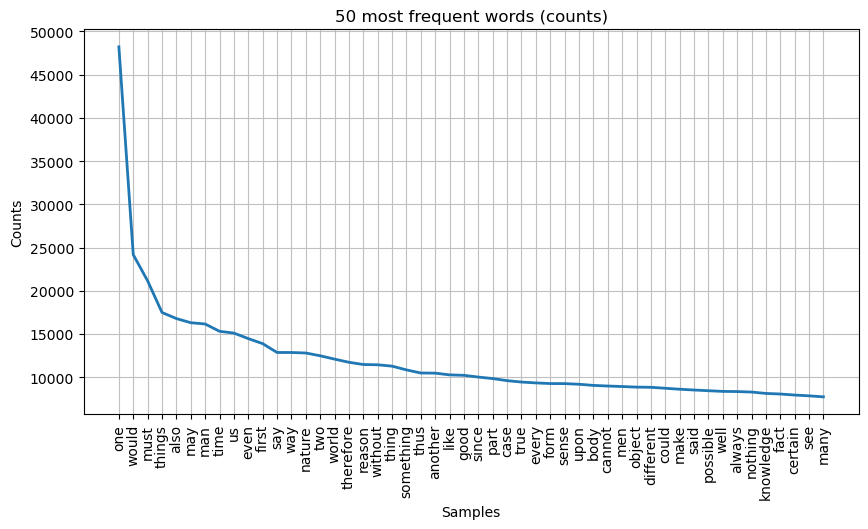

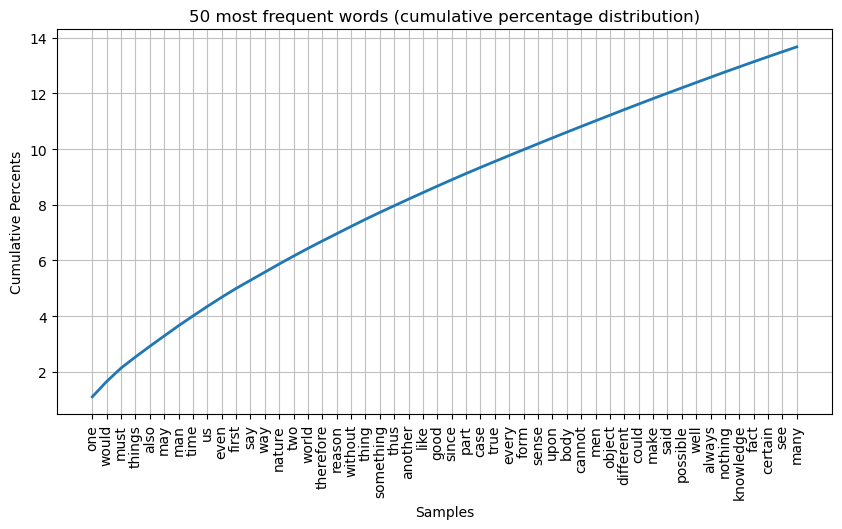

<Axes: title={'center': '50 most frequent words (cumulative percentage distribution)'}, xlabel='Samples', ylabel='Cumulative Percents'>

In [27]:
# create a new figure and plot the first graph
plt.figure(figsize=(10, 5))
overall_bow.plot(50, title='50 most frequent words (counts)', cumulative=False)

# create another new figure and plot the second graph
plt.figure(figsize=(10, 5))
overall_bow.plot(50, title='50 most frequent words (cumulative percentage distribution)', percents=True, cumulative=True)

## Distributions comparison

Our contrastive analysis is with three corpora:
- NLTK Gutenberg corpus. This comparison is interesting because this corpus should be "similar" to our reference philosophy corpus, since the former is composed of books 
- NLTK Brown corpus. This corpus is peculiar because is divided into genres (or categories), so is quite useful for studying sistematic similaritied between our corpus and different genres.
- SimpleEnglish corpus. This comparison allows us to measure how distant our corpus is from one that use a simple language, albeit covering many topics. We could describe the SimpleEnglish corpus as being "broad and short", and the philosophy corpus as being "thin and tall". 

### Gutenberg corpus

In [29]:
# Caution! This saves things locally!
# Just needs to be executed once (or once in a while, to update)
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/andrea/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

Let's see which books are included in this corpus

In [30]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

By comparing with the [list](http://philosophydata.com/bibliography.html) provided by the author of the Philosophy dataset, we can see that there are no books in common. This means that our analysis is fair, it's not spoiled by common texts between the corpora.

Upon inspection, the Gutenberg corpus is pretty clean. However, each file has those annoying headers. In the great scheme of things, they aren't very meaningful, but we can remove them pretty easily

Analogously to what we did with the philosophy corpus, we only keep the words that make up 80% of the whole count (scanning in order), put all letters in lowercase and exclude non-alphabetic charactes.

In [31]:
filtered_words = []
threshold = 0.8
for filename in gutenberg.fileids():
    words_list = gutenberg.words(filename)
    # We filter away stopwords and non-alpha words 
    # (numbers are common in this corpus, and a distributional comparison on numbers is not very meaningful)
    # We also remove the trailing header
    filtered_words.append([w for w in words_list[words_list.index(']'):] if (w.lower() not in stopwords_list and w.isalpha())])

# We lowercase the words (as we did for the philosophy corpus)
gutenberg_freq_dist = nltk.FreqDist([w.lower() for w in chain.from_iterable(filtered_words)])

# Create the distribution
gutenberg_distribution = compute_distribution(gutenberg_freq_dist, threshold)

assert sum(gutenberg_distribution.values()) == 1, "There's a problem in the normalization: sum is not one"

In [44]:
print(f"In the Gutenberg corpus there are {sum(gutenberg_freq_dist.values())} words overall.")
print(f"In the philosophy corpus there are {sum(overall_bow.values())} words overall.")

In the Gutenberg corpus there are 1025362 words overall.
In the philosophy corpus there are 4385982 words overall.


Let's now compare the distribution of our dataset with the one from the Gutenberg corpus.

The comparison I propose can be described as follows:
- The two distribution's supports will have some overlapping. That is, they'll share part of the vocabulary
- For both distributions, we compute the amount of shared mass. That is, how much mass lies on the shared support. This is a measure of "how much they have in common"
- We can see the distributions restricted to the common support as vectors, of course. So,
    - We compute the $l_2$ distance between the vectors (aka the two distributions on the shared support).
    - We compute the cosine of the angle (aka cosine similarity) between the two vectors

This should give a nice view at a glance of "how similar they are" in the part of the vocabulary which is in common.

OSS: *Keep in mind that distributions make use of a set of restrictions on the bag of words, which affect the vocabulary, specifically*

In [33]:
# shared support: words present in both corpora
shared_support = [k for k in philosophy_distribution.keys() if k in gutenberg_distribution.keys()]

shared_mass_philosophy, shared_mass_gutenberg = 0,0 
distance, norm_philosophy, norm_gutenberg, dot = 0,0,0,0
for w in shared_support:
    phil, gut = philosophy_distribution[w], gutenberg_distribution[w]
    shared_mass_philosophy += phil
    shared_mass_gutenberg += gut

    # compute the angle
    dot += phil*gut
    norm_philosophy += phil**2
    norm_gutenberg += gut**2

    # distance between the sequences
    distance += (phil-gut)**2

norm_philosophy = np.sqrt(norm_philosophy)
norm_gutenberg = np.sqrt(norm_gutenberg)
distance = np.sqrt(distance)  

print(f'{100*shared_mass_philosophy:2.2f}% of the words in the philosophy corpus are shared with the gutenberg corpus')
print(f'{100*shared_mass_gutenberg:2.2f}% of the words in the Gutenberg corpus are shared with our philosophy corpus')
print(f'The distance of the two distributions (on the shared portion of the support) is {distance:.4e}')
print(f'The cosine similarity between the two distributions (on the shared portion of the support) is {dot/(norm_philosophy*norm_gutenberg):.4f}')

73.17% of the words in the philosophy corpus are shared with the gutenberg corpus
76.42% of the words in the Gutenberg corpus are shared with our philosophy corpus
The distance of the two distributions (on the shared portion of the support) is 3.5562e-02
The cosine similarity between the two distributions (on the shared portion of the support) is 0.5900


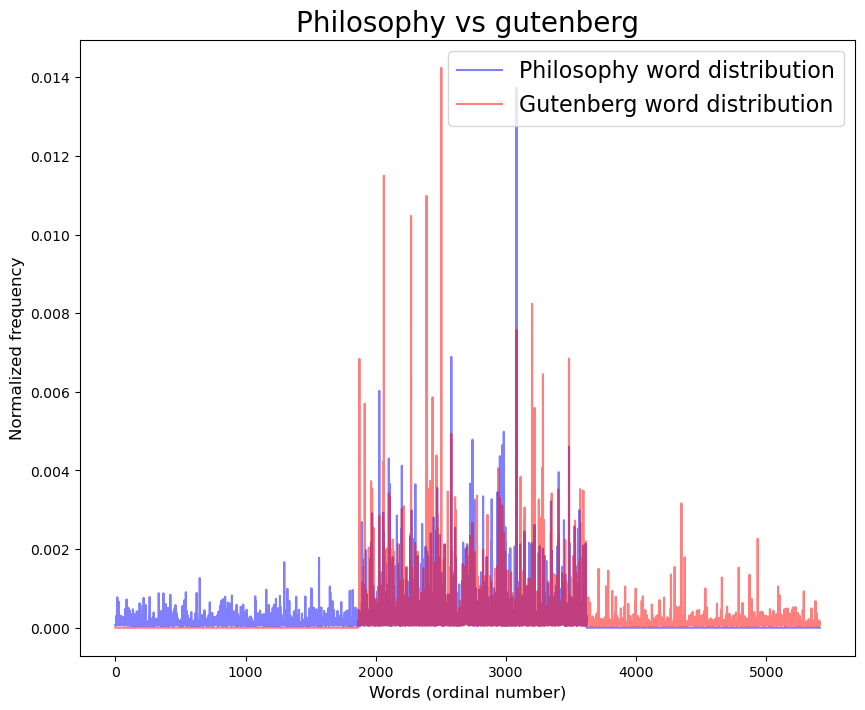

In [36]:
RANGE = 100000

plot_superimposed_distributions(philosophy_distribution,
                                        gutenberg_distribution,
                                        label1='Philosophy word distribution',
                                        label2='Gutenberg word distribution',
                                        distribution1='philosophy',
                                        distribution2='gutenberg',)
                                        #range=RANGE)
save_plot(plt, 'philosophy_vs_gutenberg_distributions')
plt.show()

The distributions show significantly different spikes, corresponding to words that are present in both vocabulary, but with radically different frequencies in the respective corpora.

### Word clouds

Who doesn't love those

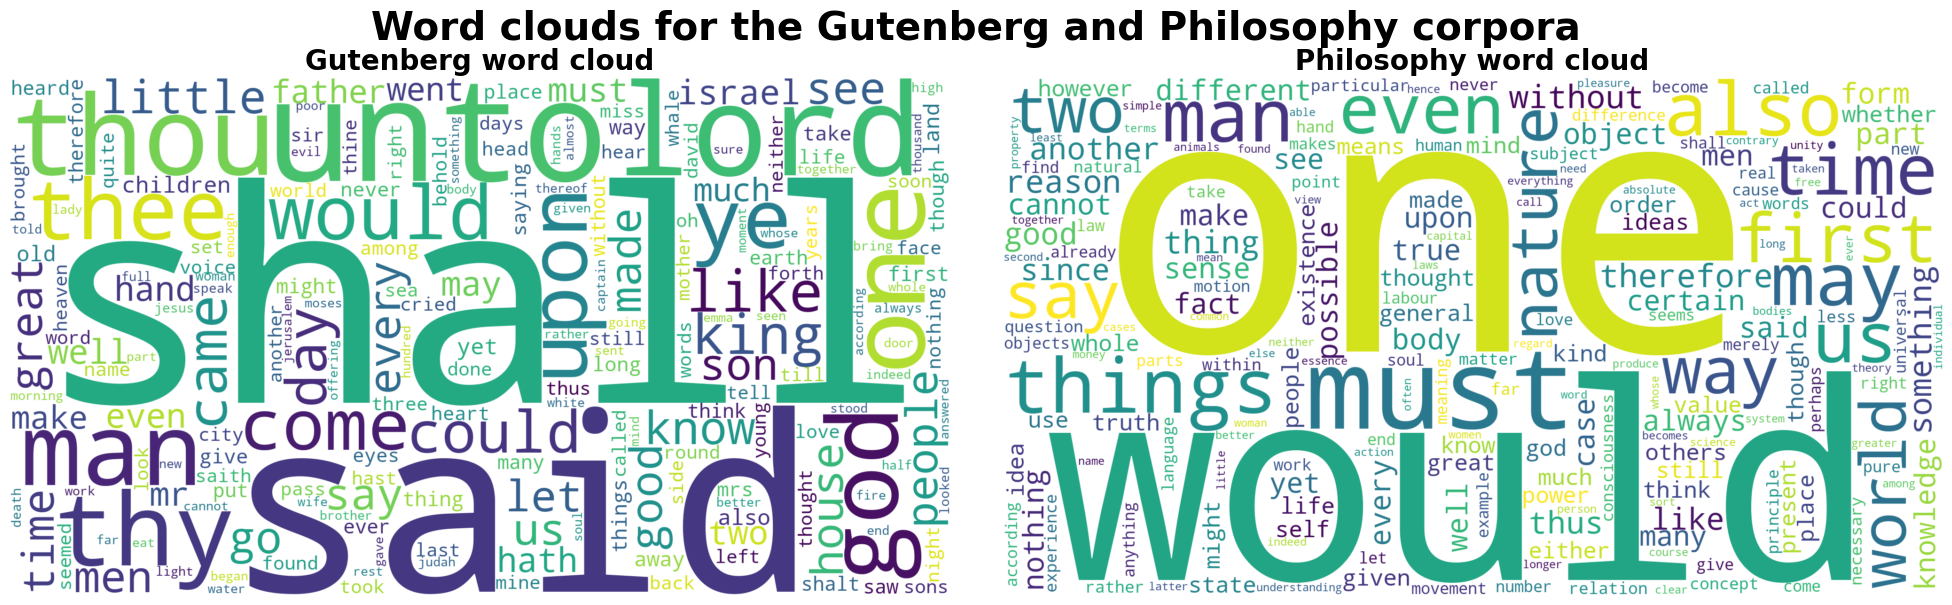

In [37]:
from exploration_utils import make_wordcloud

fig, ax = plt.subplots(1,2,figsize=(20,6))

wcGutenberg = make_wordcloud(gutenberg_distribution)    # thresholded and normalized
wcPhilosophy = make_wordcloud(philosophy_distribution)  # thresholded and normalized

ax[0].imshow(wcGutenberg, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Gutenberg word cloud', fontsize=20, fontweight='bold')

ax[1].imshow(wcPhilosophy, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Philosophy word cloud', fontsize=20, fontweight='bold')

plt.suptitle('Word clouds for the Gutenberg and Philosophy corpora', fontsize=28, fontweight='bold', y=1)

plt.tight_layout()
save_plot(plt, 'wordclouds_gutenberg_philosophy')
plt.show()

### Brown Corpus

In [38]:
# Caution! This saves things locally!
# Just needs to be executed once (or once in a while, to update)
nltk.download('brown')

[nltk_data] Downloading package brown to /home/andrea/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [39]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [40]:
print(f'The Brown corpus consists of {len(brown.words())} words')

The Brown corpus consists of 1161192 words


For the Brown corpus, we repeat the same steps, with one variation: we compare the distribution of each category in the Brown corpus with the philosophy corpus separately.

In [45]:
# word frequencies per category
brown_words_per_cat, brown_distribution = {}, {}

# For each category, we again focus on 80% of the mass
threshold = 0.8

for category in brown.categories():
    filtered_words = [w for w in brown.words(categories=category) if (w.lower() not in stopwords_list and w.isalpha())]
    
    # As already noted, we compare lowercase letters because we're just interested in counts/frequencies.
    # Maybe capitalizing some words may convey meaning, but it's something for
    # the classifiers, not this analysis.   
    freq_dist = nltk.FreqDist(w.lower() for w in filtered_words)
    
    # Create the distribution
    brown_distribution[category] = compute_distribution(freq_dist, threshold)    
    assert(sum(brown_distribution[category].values()) == 1), f"Category {category} is not normalized"


Let's now compare the distributions we have for our data with the ones we have for each category in the Brown corpus.

We use the same approach we used for the Gutenberg corpus.

In [46]:
shared_support, shared_mass_philosophy, shared_mass_brown = {},{},{}
dot, norm_philosophy, norm_brown, distance = {},{},{},{}

for category in brown.categories():
    shared_support[category] = [k for k in philosophy_distribution.keys() if k in brown_distribution[category].keys()]

    shared_mass_philosophy[category], shared_mass_brown[category], distance[category] = 0,0,0
    norm_brown[category], norm_philosophy[category], dot[category] = 0,0,0

    for w in shared_support[category]:
        phil, brwn = philosophy_distribution[w], brown_distribution[category][w]
        shared_mass_philosophy[category] += phil
        shared_mass_brown[category] += brwn

        # angle
        dot[category] += phil*brwn
        norm_philosophy[category] += phil**2
        norm_brown[category] += brwn**2      

        # distance
        distance[category] += (phil-brwn)**2

    norm_philosophy[category] = np.sqrt(norm_philosophy[category])
    norm_brown[category] = np.sqrt(norm_brown[category])
    distance[category] = np.sqrt(distance[category])

    print(f'Category {category} of the Brown corpus:')
    print(f'\t{100*shared_mass_philosophy[category]:2.2f}% of the words in the philosophy corpus are shared with the Brown corpus (for category {category})')
    print(f'\t{100*shared_mass_brown[category]:2.2f}% of the words in the Brown corpus are shared with our philosophy corpus (for category {category})')
    print(f'\tDistance: {distance[category]:.4e}')
    print(f'\tCosine similarity: {dot[category]/(norm_philosophy[category]*norm_brown[category]):.4f}')
    print()

Category adventure of the Brown corpus:
	56.50% of the words in the philosophy corpus are shared with the Brown corpus (for category adventure)
	65.49% of the words in the Brown corpus are shared with our philosophy corpus (for category adventure)
	Distance: 2.9330e-02
	Cosine similarity: 0.6382

Category belles_lettres of the Brown corpus:
	86.60% of the words in the philosophy corpus are shared with the Brown corpus (for category belles_lettres)
	76.60% of the words in the Brown corpus are shared with our philosophy corpus (for category belles_lettres)
	Distance: 1.9047e-02
	Cosine similarity: 0.8445

Category editorial of the Brown corpus:
	73.23% of the words in the philosophy corpus are shared with the Brown corpus (for category editorial)
	71.04% of the words in the Brown corpus are shared with our philosophy corpus (for category editorial)
	Distance: 2.3062e-02
	Cosine similarity: 0.7503

Category fiction of the Brown corpus:
	62.68% of the words in the philosophy corpus are sha

With our incredible `plot_superimposed_distributions` function - introduced in the earlier section - we can easily plot the overlap of the distributions.

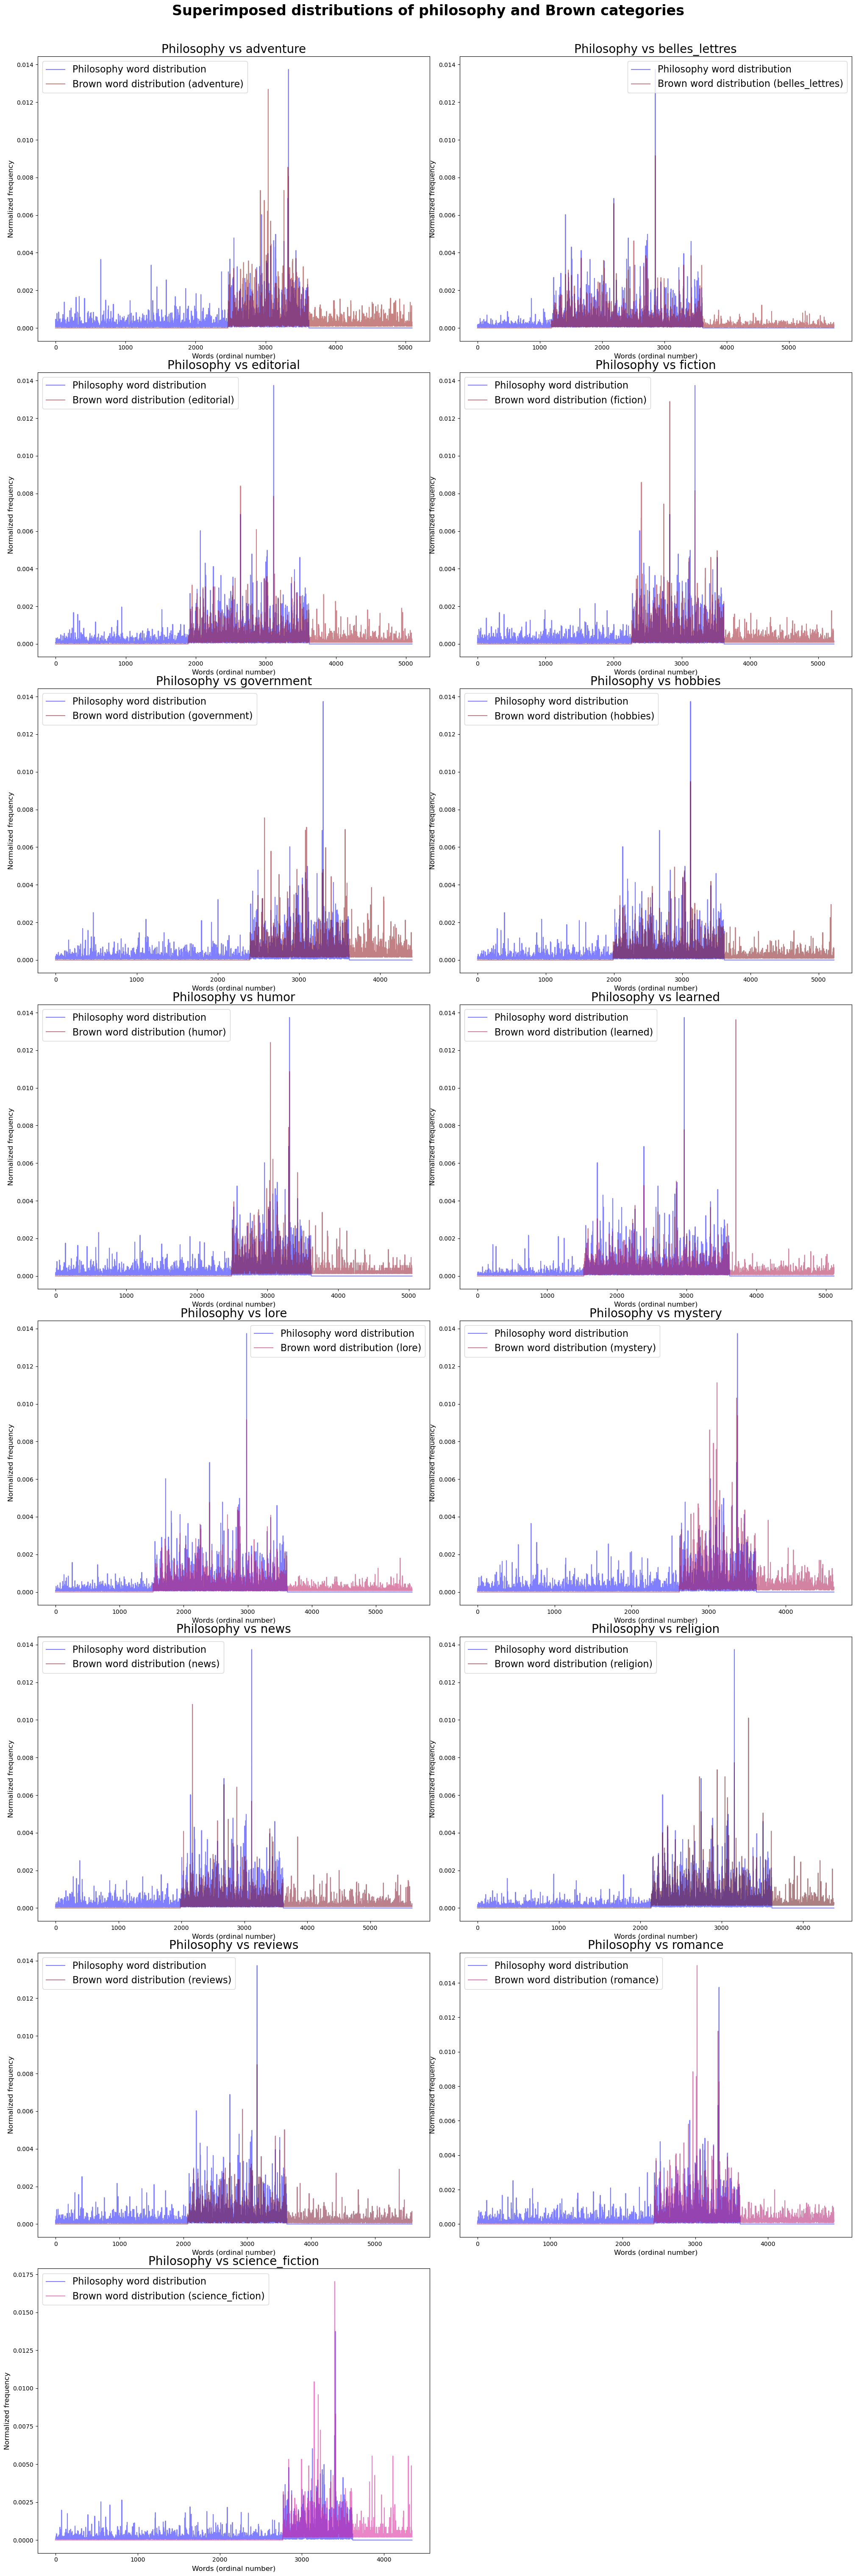

In [50]:
fig, axs = plt.subplots(8,2,figsize=(20,60))
axs = axs.ravel()

for i,category in enumerate(brown.categories()):
    plot_superimposed_distributions(philosophy_distribution, 
                                            brown_distribution[category],
                                            label1='Philosophy word distribution',
                                            label2=f'Brown word distribution ({category})',
                                            distribution1='philosophy',
                                            distribution2=f'{category}',
                                            color2=((145+5*i*np.sin(i))/255,(7+5*np.sin(i))/255,(7+5*i*(np.sin(i)+0.974))/255),
                                            ax=axs[i])

for i in range(len(brown.categories()),16):
    axs[i].axis('off')

plt.suptitle('Superimposed distributions of philosophy and Brown categories', fontsize=24, y=1.01, fontweight='bold')
plt.tight_layout(pad=0)
save_plot(plt, 'philosophy_vs_brown_distributions') 
plt.show()

### Simple english wikipedia corpus

The last corpus with which we compare our philosophy dataset is the [Plain text Wikipedia corpus](https://www.kaggle.com/datasets/ffatty/plain-text-wikipedia-simpleenglish).

In [51]:
WIKI_DIR = 'Exploration/SimpleEnglishWikipedia'

In [53]:
# Yes, we read the whole wikipedia
filename = os.path.join("..",WIKI_DIR,'AllCombined.txt')

with open(filename,'r') as f:
    wiki_words = f.read()

The `AllCombined.txt` file combines all the Wikipedia pages. The file is structured in a very simple way: there are always (at least) two blank lines, then the topic of the wikipedia page is written in a single line, after that there is (at least) another blank line, and finally the content of the Wikipedia article.

We can exploit this structure to remove the pages' titles. It's a very basic preprocessing that reduces the redundancies.

OSS: *One can easily check that some articles are incomplete. For example, some bullet point lists may be missing. This is not relevant though, as - again - we're not training a model on this data, we're just using this data to compare word distributions*.

In [56]:
pattern = r'\n\n[\w ]+\n\n+(\w)'
replacement = r'\n\n\1'

wiki_words = re.sub(pattern, replacement, wiki_words)

In [80]:
threshold = 0.75 # we keep 70% of the mass (less than the other corpora, because this is a much larger corpus)

# We tokenize the whole wikipedia (!!) ...
# ... then we filter away stopwords and non-alphabetic words
wikipedia_words = [w for w in nltk.word_tokenize(wiki_words) if (w.isalpha() and w.lower() not in stopwords_list)]

# We create a BoW (just counting)
wikipedia_bow = nltk.FreqDist([w.lower() for w in wikipedia_words])

# We create the distribution
wikipedia_distribution = compute_distribution(wikipedia_bow, threshold)

assert sum(wikipedia_distribution.values()) == 1, "There's a problem in the normalization: sum is not one"

In [81]:
print(f"In the Wikipedia corpus there are {sum(wikipedia_bow.values())} words")
print(f"In the philosophy corpus there are {sum(overall_bow.values())} words")

In the Wikipedia corpus there are 15663099 words
In the philosophy corpus there are 4385982 words


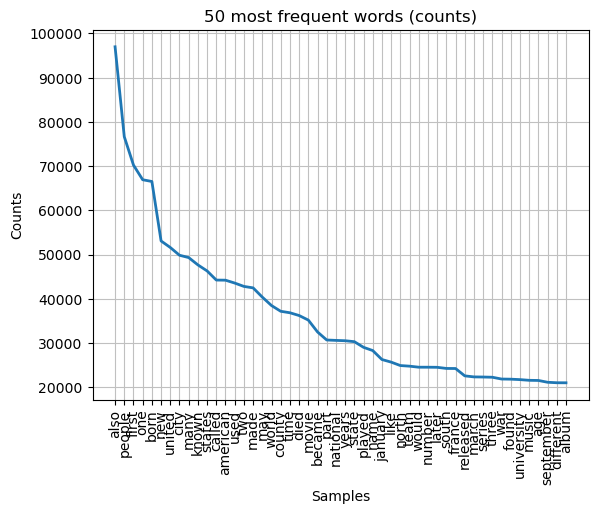

<Axes: title={'center': '50 most frequent words (counts)'}, xlabel='Samples', ylabel='Counts'>

In [82]:
wikipedia_bow.plot(50, title='50 most frequent words (counts)', cumulative=False)

We compare our Philosophy corpus with Wikipedia in Simple English using the same approach as in the previous two sections.

In [83]:
shared_support = [k for k in philosophy_distribution.keys() if k in wikipedia_distribution.keys()]

shared_mass_philosophy, shared_mass_wikipedia, distance = 0,0,0
norm_wikipedia, norm_philosophy, dot = 0,0,0

for w in shared_support:
    phil, wiki = philosophy_distribution[w], wikipedia_distribution[w]
    shared_mass_philosophy += phil
    shared_mass_wikipedia += wiki

    # angle
    dot += phil*wiki
    norm_philosophy += phil**2
    norm_wikipedia += wiki**2

    # distance
    distance += (phil-wiki)**2

norm_philosophy = np.sqrt(norm_philosophy)
norm_wikipedia = np.sqrt(norm_wikipedia)
distance = np.sqrt(distance)

print(f'{100*shared_mass_philosophy:2.2f}% of the words in the philosophy corpus are shared with the Wikipedia simple English corpus')
print(f'{100*shared_mass_wikipedia:2.2f}% of the words in the Wikipedia simple English corpus are shared with our philosophy corpus')
print(f'The distance of the two distributions (on the shared portion of the support) is {distance:.4e}')
print(f'The cosine similarity between the two distributions (on the shared portion of the support) is {dot/(norm_philosophy*norm_wikipedia):.4f}')

78.90% of the words in the philosophy corpus are shared with the Wikipedia simple English corpus
62.91% of the words in the Wikipedia simple English corpus are shared with our philosophy corpus
The distance of the two distributions (on the shared portion of the support) is 3.0006e-02
The cosine similarity between the two distributions (on the shared portion of the support) is 0.5664


We can display our usual plot with the superimposed distributions

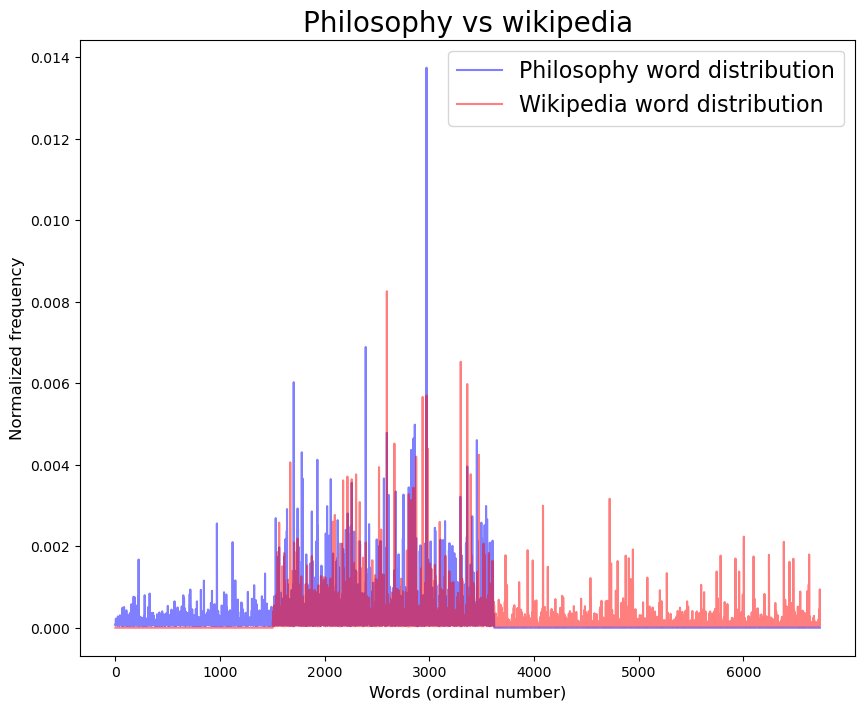

In [84]:
plot_superimposed_distributions(philosophy_distribution,
                                wikipedia_distribution,
                                label1='Philosophy word distribution',
                                label2='Wikipedia word distribution',
                                distribution1='philosophy',
                                distribution2='wikipedia',
                                range=100000)
save_plot(plt, 'philosophy_vs_wikipedia_distributions')
plt.show()

The common words are more frequent in the Philosophy corpus than in the Simple English Wikipedia corpus. 

The Philosophy corpus' vocabulary has a significant overlap with the Wikipedia corpus' vocabulary, greater than the one with the Gutenberg corpus. 

Of course, a smaller percentage of the Wikipedia corpus' own vocabulary is also shared with the philosophy corpus (62.83%). This is of course expected, but let's keep in mind that many words are likely excluded from tha bag of words due to thresholding. 

## Conclusions

We compared our philosophy corpus with three chosen corpora, the Gutenberg corpus, the Brown corpus and the Simple English wikipedia corpus.

Our analysis focused on the top 80% of the distributions, which are populated by very few words, compared with the overall size of the vocabularies. That is, the word distributions are very non-uniform.